<a href="https://colab.research.google.com/github/cherrysober/capstone_PA/blob/main/Projek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Konsumsi Bahan Bakar dan Efisiensi Perjalanan: Analisis Komprehensif dan Perancangan Website untuk Periode 13-24 Mei 2023 pada Kapal FMC Marnaik**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats

**Library untuk Splitting Data**

In [3]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [4]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

###Business Objective

Tujuan dari analisis dataset konsumsi bahan bakar dan efisiensi perjalanan kapal FMC Marnaik selama periode 13-24 Mei 2023 adalah untuk mendapatkan pemahaman yang komprehensif tentang pola konsumsi bahan bakar, efisiensi perjalanan, dan operasional kapal selama periode yang ditentukan. Dengan pemahaman yang mendalam tentang faktor-faktor yang mempengaruhi konsumsi bahan bakar dan efisiensi perjalanan, tujuan utamanya adalah untuk mengidentifikasi potensi peningkatan efisiensi operasional, mengurangi biaya operasional, serta meningkatkan keberlanjutan lingkungan. Melalui analisis ini, diharapkan dapat dikembangkan strategi operasional yang lebih efektif dan dapat memberikan kontribusi positif terhadap kinerja keseluruhan kapal FMC Marnaik.

###Assess Situation

Analisis dataset ini dilakukan karena kebutuhan untuk meningkatkan efisiensi operasional dan mengoptimalkan penggunaan bahan bakar pada kapal FMC Marnaik selama periode 13-24 Mei 2023. Tingginya biaya operasional, tuntutan lingkungan yang semakin ketat, perubahan kondisi operasional, dan ketidakpastian ekonomi merupakan faktor-faktor yang mendasari kebutuhan akan pemahaman mendalam tentang pola konsumsi bahan bakar dan efisiensi perjalanan. Dengan memahami data ini, perusahaan dapat mengambil langkah-langkah untuk mengurangi biaya operasional, meminimalkan dampak lingkungan, dan mengelola risiko ekonomi yang terkait dengan operasi kapal.

###Data Mining Goals

Tujuan dari Data Mining pada dataset ini adalah untuk mengembangkan model yang dapat memprediksi konsumsi bahan bakar dan efisiensi perjalanan kapal FMC Marnaik di masa mendatang. Hal ini melibatkan analisis faktor-faktor yang mempengaruhi konsumsi bahan bakar dan efisiensi perjalanan, seperti rute perjalanan, dan waktu operasional mesin utama. Selain itu, tujuan juga mencakup pengembangan model prediktif untuk memprediksi konsumsi bahan bakar dan efisiensi perjalanan di masa mendatang berdasarkan variabel seperti kondisi operasional dan beban angkutan. Dengan demikian, data mining bertujuan untuk memberikan wawasan yang mendalam tentang operasi kapal dan membantu perusahaan dalam mengambil keputusan yang lebih baik untuk meningkatkan efisiensi operasional dan mengurangi biaya.

###Project Plan


Rencana proyek untuk menganalisis dataset konsumsi bahan bakar dan efisiensi perjalanan kapal FMC Marnaik selama periode 13-24 Mei 2023 dimulai dengan pengumpulan data lengkap, diikuti oleh pemahaman data dan analisis awal untuk mengidentifikasi pola yang signifikan. Selanjutnya, akan dibangun model prediktif untuk memprediksi konsumsi bahan bakar dan efisiensi perjalanan di masa mendatang, dengan validasi model yang cermat. Hasil analisis akan diinterpretasikan untuk memberikan wawasan yang berguna bagi pengambilan keputusan strategis terkait efisiensi operasional kapal, dengan implementasi solusi yang direncanakan dan evaluasi terus-menerus untuk memastikan pencapaian tujuan proyek.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber dari pemodelan data yang saya ambil berasal dari

In [6]:
df = pd.read_csv("/content/FMC Marnaik Periode 13 - 24 Mei 2023.csv")
df.head()

,Date,From,To,Start ME,Stop ME,Running Minutes,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After
0,13-05-2023,PSTB,Somber,4:55:00,5:36:00,0:41,46.0,23.6,22.6,980
1,13-05-2023,Running ME/Stand by,Running ME/Stand by,5:36:00,5:40:00,0:04,46.0,23.6,22.6,980
2,13-05-2023,SOMBER,PSTB,5:40:00,6:15:00,0:35,46.0,23.6,22.6,980
3,13-05-2023,Running ME/Stand by,Running ME/Stand by,6:15:00,6:20:00,0:05,46.0,23.6,22.6,980
4,13-05-2023,PSTB,SOMBER,6:20:00,7:00:00,0:40,46.0,23.6,22.6,980


In [7]:
df

,Date,From,To,Start ME,Stop ME,Running Minutes,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After
0,13-05-2023,PSTB,Somber,4:55:00,5:36:00,0:41,46.0,23.6,22.6,980
1,13-05-2023,Running ME/Stand by,Running ME/Stand by,5:36:00,5:40:00,0:04,46.0,23.6,22.6,980
2,13-05-2023,SOMBER,PSTB,5:40:00,6:15:00,0:35,46.0,23.6,22.6,980
3,13-05-2023,Running ME/Stand by,Running ME/Stand by,6:15:00,6:20:00,0:05,46.0,23.6,22.6,980
4,13-05-2023,PSTB,SOMBER,6:20:00,7:00:00,0:40,46.0,23.6,22.6,980
...,...,...,...,...,...,...,...,...,...,...
131,24-05-2023,Running ME/Stand by,Running ME/Stand by,17:35:00,17:40:00,0:05,55.2,22.5,21.3,897
132,24-05-2023,SOMBER,PSTB,17:40:00,18:10:00,0:30,55.2,22.5,21.3,897
133,24-05-2023,Running ME/Stand by,Running ME/Stand by,18:10:00,18:15:00,0:05,55.2,22.5,21.3,897
134,24-05-2023,PSTB,SOMBER,18:15:00,18:50:00,0:35,55.2,22.5,21.3,897


1. **Date**: Kolom ini menyimpan tanggal kejadian peristiwa yang tercatat dalam dataset, dengan format tanggal-bulan-tahun.
2. **From**: Kolom ini mencatat lokasi awal perjalanan kapal, yang merupakan pelabuhan atau titik keberangkatan.
3. **To**: Kolom ini mencatat lokasi tujuan perjalanan kapal, yang merupakan pelabuhan atau titik kedatangan.
4. **Start ME (Main Engine)**: Kolom ini mencatat waktu mulai mesin utama (ME) pada kapal, yang menunjukkan waktu awal operasi mesin.
5. **Stop ME (Main Engine)**: Kolom ini mencatat waktu berhenti mesin utama (ME) pada kapal, yang menunjukkan waktu akhir operasi mesin.
6. **Running Minutes**: Kolom ini mencatat durasi waktu dalam menit selama mesin utama (ME) beroperasi.
7. **Fuel Daily Consumption**: Kolom ini mencatat jumlah bahan bakar yang dikonsumsi oleh kapal pada hari tersebut, dalam satuan liter.
8. **Opening Fuel Tank Sounding**: Kolom ini mencatat volume bahan bakar di dalam tangki sebelum perjalanan dimulai, yang digunakan sebagai pengukuran awal.
9. **Closing Fuel Tank Sounding**: Kolom ini mencatat volume bahan bakar di dalam tangki setelah perjalanan selesai, yang digunakan sebagai pengukuran akhir.
10. **Fuel Tank Stock After**: Kolom ini mencatat sisa stok bahan bakar di dalam tangki setelah perjalanan selesai, yang merupakan hasil dari pengurangan Closing Fuel Tank Sounding dari Opening Fuel Tank Sounding.

##**Describe Data**

###Informasi Dasar

In [8]:
df.shape

(136, 10)

Pada dataset "Optimalkan Konsumsi Bahan Bakar dan Efisiensi Perjalanan: Analisis Komprehensif dan Perancangan Website untuk Periode 13-24 Mei 2023 pada Kapal FMC Marnaik" ini memiliki 137 baris dan 10 kolom

###Informasi Lanjutan

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        136 non-null    object 
 1   From                        136 non-null    object 
 2   To                          136 non-null    object 
 3   Start ME                    136 non-null    object 
 4   Stop ME                     136 non-null    object 
 5   Running Minutes             136 non-null    object 
 6   Fuel Daily Consumption      136 non-null    float64
 7   Opening Fuel Tank Sounding  136 non-null    float64
 8   Closing Fuel Tank Sounding  136 non-null    float64
 9   Fuel Tank Stock After       136 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 10.8+ KB


1. **Column**: Ini adalah nama kolom-kolom dalam DataFrame Anda.
Non-Null Count: Jumlah nilai non-null dalam setiap kolom. Dalam kasus ini, semuanya memiliki 136 nilai non-null, yang berarti tidak ada nilai yang hilang dalam dataset.
2. **Dtype**: Tipe data dari setiap kolom.
object: Tipe data umum untuk data teks atau string.
3. **float64**: Tipe data untuk angka floating point dengan presisi ganda (64-bit).

###Informasi Deskriptif

In [10]:
df.describe()

,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After
count,136.000000,136.000000,136.000000,136.000000
mean,52.122059,19.624265,18.511765,835.529412
std,6.602364,3.290941,3.267008,133.568789
min,18.400000,14.100000,13.100000,589.000000
25%,50.600000,16.500000,15.300000,718.000000
50%,55.200000,20.300000,19.200000,874.000000
75%,55.200000,22.600000,21.500000,952.000000
max,55.200000,23.700000,22.600000,1007.000000


1. **Fuel Daily Consumption**:
Rata-rata (mean): 52.122059
Standar deviasi (std): 6.602364
Nilai minimum (min): 18.400000
Kuartil pertama (25%): 50.600000
Median (50%): 55.200000
Kuartil ketiga (75%): 55.200000
Nilai maksimum (max): 55.200000
Count: 136
2. **Opening Fuel Tank Sounding**:
Rata-rata (mean): 19.624265
Standar deviasi (std): 3.290941
Nilai minimum (min): 14.100000
Kuartil pertama (25%): 16.500000
Median (50%): 20.300000
Kuartil ketiga (75%): 22.600000
Nilai maksimum (max): 23.700000
Count: 136
3. **Closing Fuel Tank Sounding**:
Rata-rata (mean): 18.511765
Standar deviasi (std): 3.267008
Nilai minimum (min): 13.100000
Kuartil pertama (25%): 15.300000
Median (50%): 19.200000
Kuartil ketiga (75%): 21.500000
Nilai maksimum (max): 22.600000
Count: 136
4. **Fuel Tank Stock After**:
Rata-rata (mean): 835.529412
Standar deviasi (std): 133.568789
Nilai minimum (min): 589.000000
Kuartil pertama (25%): 718.000000
Median (50%): 874.000000
Kuartil ketiga (75%): 952.000000
Nilai maksimum (max): 1007.000000
Count: 136

##**Exploratory Data Analysis**

### Korelasi Antar Kolom

In [11]:
px.imshow(df.corr(numeric_only=True))

###Tingkat Efisiensi Bahan Bakar Pada Kapal FMC Marnik

Text(0.5, 1.0, 'Tingkat Efisiensi Bahan Bakar Harian Pada Kapal FMC Marnaik')

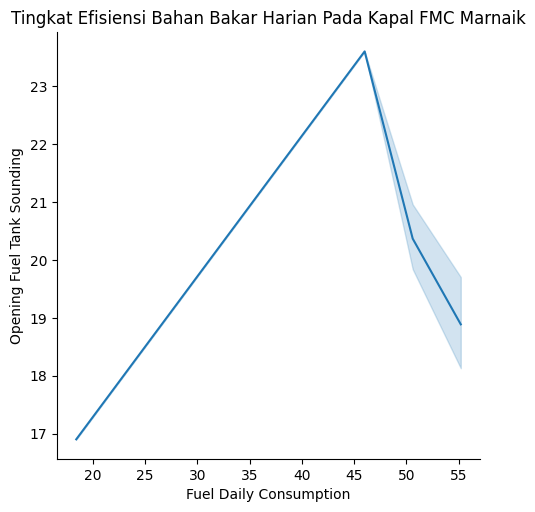

In [12]:
sns.relplot(x='Fuel Daily Consumption', y='Opening Fuel Tank Sounding', data=df, kind='line')
plt.xlabel('Fuel Daily Consumption')
plt.ylabel('Opening Fuel Tank Sounding')
plt.title('Tingkat Efisiensi Bahan Bakar Harian Pada Kapal FMC Marnaik')

Grafik yang diberikan menggambarkan konsumsi bahan bakar **Kapal FMC Marnik** seiring berjalannya waktu. Setiap titik pada grafik mewakili data, dengan sumbu x menunjukkan waktu (dalam hari) dan sumbu y menunjukkan konsumsi bahan bakar harian.

<Axes: xlabel='Closing Fuel Tank Sounding', ylabel='Count'>

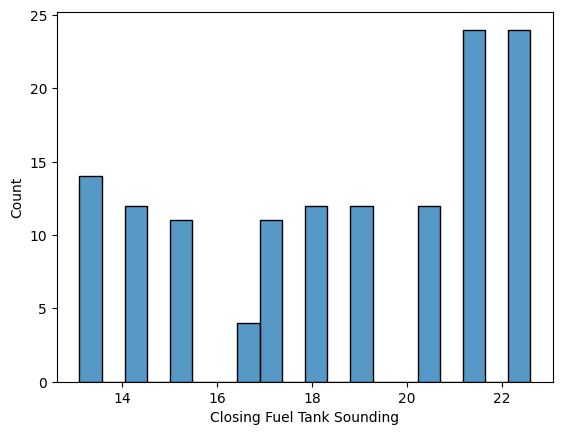

In [13]:
sns.histplot(df['Closing Fuel Tank Sounding'].dropna(), bins=20)

Visualisasi histogram ini mewakili distribusi volume bahan bakar dalam tangki setelah perjalanan selesai, yang mencerminkan pengukuran akhir setelah **Kapal FMC Marnaik** mencapai tujuan.

Histogram menunjukkan sebaran volume bahan bakar dalam tangki setelah perjalanan selesai, dengan tinggi batang pada setiap bin menunjukkan seberapa sering volume bahan bakar jatuh ke dalam rentang tersebut. Ini memberikan pemahaman tentang seberapa sering kapal mencapai tujuan dengan volume bahan bakar tertentu setelah perjalanan.

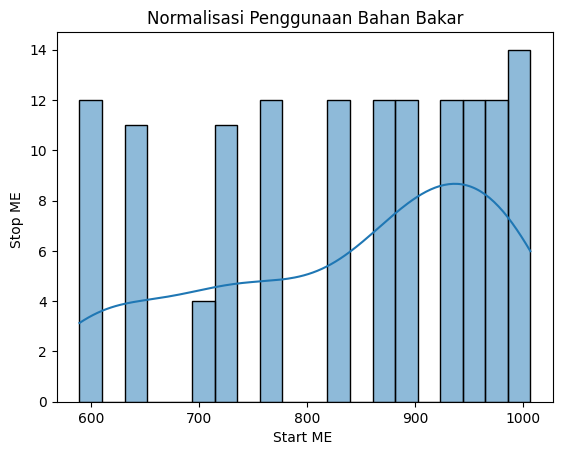

In [14]:
sns.histplot(df['Fuel Tank Stock After'].dropna(), bins=20, kde=True)
plt.title('Normalisasi Penggunaan Bahan Bakar')
plt.xlabel("Start ME ")
plt.ylabel('Stop ME ')
plt.show()

Visualisasi histogram ini menggambarkan distribusi frekuensi dari variabel "**Start ME**" dan "**Stop ME**" pada Kapal FMC Marnaik selama periode 13-24 Mei 2023. Histogram menampilkan seberapa sering mesin dimulai dan berhenti dalam rentang waktu yang ditentukan.

Distribusi frekuensi "**Start ME**" menunjukkan kecenderungan untuk memulai mesin pada berbagai titik waktu, dengan beberapa waktu mungkin lebih umum daripada yang lain. Sementara itu, distribusi frekuensi "**Stop ME**" menunjukkan pola yang serupa dalam hal berhenti mesin, menyoroti waktu-waktu tertentu di mana berhenti mesin lebih sering terjadi.

<ipython-input-15-aa23995585d3>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Closing Fuel Tank Sounding')

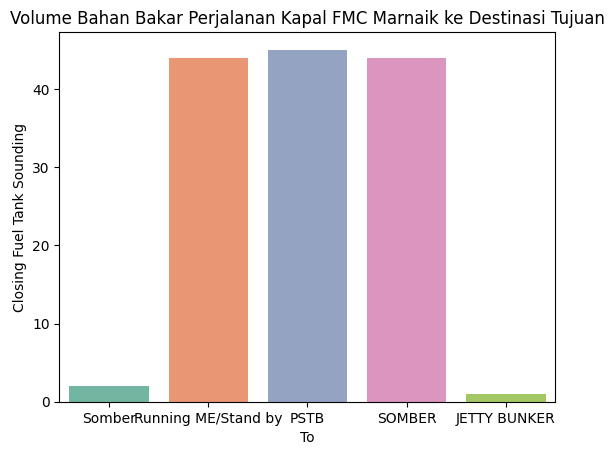

In [15]:
sns.countplot(x='To', data=df, palette='Set2')
plt.title('Volume Bahan Bakar Perjalanan Kapal FMC Marnaik ke Destinasi Tujuan')
plt.xlabel('To')
plt.ylabel('Closing Fuel Tank Sounding')

Grafik yang diberikan menampilkan volume bahan bakar yang dikonsumsi oleh **Kapal FMC Marnaik** selama perjalanannya menuju tujuan. Setiap batang pada grafik mewakili tahap tertentu dalam perjalanan, dengan sumbu x menunjukkan tahapan dan sumbu y menunjukkan konsumsi bahan bakar untuk setiap tahap. Grafik ini memberikan wawasan berharga tentang pola penggunaan bahan bakar kapal dan dapat digunakan untuk mengidentifikasi area yang perlu ditingkatkan dalam hal efisiensi bahan bakar.

<Axes: ylabel='count'>

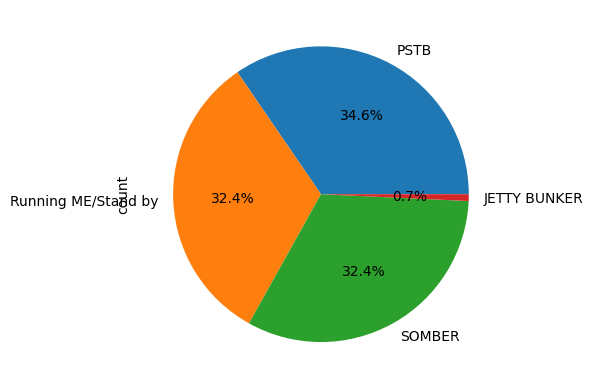

In [16]:
From_counts = df['From'].value_counts()
From_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360)

Pie chart di atas menampilkan persentase penggunaan tempat awal sebelum **Kapal FMC Marnaik** berlayar, yang diukur dalam interval harian. Berdasarkan data tersebut, terdapat empat kategori utama yang mencakup penggunaan tempat tersebut:

* **PSTB (Port Service Transport Barge)**: Mewakili 34.6% dari total penggunaan tempat, menjadikannya kategori dengan persentase tertinggi.
* **Somber**: Menempati 32.4% dari total penggunaan tempat, jumlahnya hampir sebanding dengan penggunaan PSTB.
* **Running ME/Stand by**: Kategori ini juga mencapai 32.4% dari total penggunaan tempat, dengan jumlah yang sama dengan kategori Somber.
* **Jetty Bunker**: Meskipun memiliki kontribusi yang lebih kecil, yaitu hanya 0.7%, kategori ini tetap merupakan bagian dari penggunaan tempat awal sebelum kapal berlayar.

## **Verify Data Quality**

###Missing Values

In [17]:
df.isna()

,Date,From,To,Start ME,Stop ME,Running Minutes,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
131,False,False,False,False,False,False,False,False,False,False
132,False,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isna().sum()

Date                          0
From                          0
To                            0
Start ME                      0
Stop ME                       0
Running Minutes               0
Fuel Daily Consumption        0
Opening Fuel Tank Sounding    0
Closing Fuel Tank Sounding    0
Fuel Tank Stock After         0
dtype: int64

Berdasarkan hasil analisis awal diatas, terlihat bahwa ada satu **missing values** atau data yang hilang pada data tersebut.

###Outliers Values

In [19]:
def detect_outliers(column):
    column = pd.to_numeric(column, errors='coerce')

    column = column.dropna()

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers

for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

Kolom 'Date':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'From':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'To':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'Start ME':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'Stop ME':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'Running Minutes':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'Fuel Daily Consumption':
  - Jumlah outliers: 4
  - Persentase kehadiran outliers: 2.94%

Kolom 'Opening Fuel Tank Sounding':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Closing Fuel Tank Sounding':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Fuel Tank Stock After':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%



<ipython-input-19-13b4bbc91115>:12: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-19-13b4bbc91115>:12: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-19-13b4bbc91115>:12: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-19-13b4bbc91115>:12: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-19-13b4bbc91115>:12: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-19-13b4bbc91115>:12: RuntimeWarning:

invalid value encountered in scalar divide



1. **Kolom 'Date'**: Tidak ada outlier yang terdeteksi dalam kolom ini, sehingga persentase kehadiran outlier adalah 0%.
2. **Kolom 'From' dan 'To'**: Tidak ada outlier yang terdeteksi dalam kedua kolom ini, sehingga persentase kehadiran outlier adalah 0%.
3. **Kolom 'Start ME' dan 'Stop ME'**: Tidak ada outlier yang terdeteksi dalam kedua kolom ini, sehingga persentase kehadiran outlier adalah 0%.
4. **Kolom 'Running Minutes'**: Tidak ada outlier yang terdeteksi dalam kolom ini, sehingga persentase kehadiran outlier adalah 0%.
5. **Kolom 'Fuel Daily Consumption'**: Terdapat 4 outlier yang terdeteksi dalam kolom ini, yang menyumbang sekitar 2.94% dari total data.
6. **Kolom 'Opening Fuel Tank Sounding', 'Closing Fuel Tank Sounding', dan 'Fuel Tank Stock After'**: Tidak ada outlier yang terdeteksi dalam ketiga kolom ini, sehingga persentase kehadiran outlier adalah 0%.
8. **Catatan**: Terdapat beberapa pesan kesalahan yang muncul selama analisis, yang mungkin disebabkan oleh pembagian dengan nol atau nilai yang tidak valid dalam proses perhitungan outlier.

###Duplicated Values

In [20]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
131    False
132    False
133    False
134    False
135    False
Length: 136, dtype: bool

Berdasarkan hasil analisis awal pada data diatas, dapat disimpulkan bahwa sebagian besar tidak terdapat **duplicated values** atau nilai yang terduplikat pada data tersebut.

### Data Reduction

#**DATA PREPARATION**

##**Data Cleaning**

In [21]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [22]:
df = df.drop(['Start ME', 'Stop ME', 'Running Minutes'], axis=1)

Menghapus kolom '**Start ME**', '**Stop ME**', dan '**Running Minutes**' dari dataset  beralasan jika kolom-kolom tersebut tidak relevan untuk analisis yang sedang dilakukan. Tindakan ini dapat mempercepat proses analisis, meningkatkan keterbacaan kode, mengurangi kompleksitas dataset, dan menghemat ruang penyimpanan.

In [23]:
df.head()

,Date,From,To,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After
0,13-05-2023,PSTB,Somber,46.0,23.6,22.6,980
1,13-05-2023,Running ME/Stand by,Running ME/Stand by,46.0,23.6,22.6,980
2,13-05-2023,SOMBER,PSTB,46.0,23.6,22.6,980
3,13-05-2023,Running ME/Stand by,Running ME/Stand by,46.0,23.6,22.6,980
4,13-05-2023,PSTB,SOMBER,46.0,23.6,22.6,980


###**Penanganan Missing Value**

In [24]:
print((df.isna().sum() / len(df)) * 100)

Date                          0.0
From                          0.0
To                            0.0
Fuel Daily Consumption        0.0
Opening Fuel Tank Sounding    0.0
Closing Fuel Tank Sounding    0.0
Fuel Tank Stock After         0.0
dtype: float64


In [25]:
num_rows = df.shape[0]
df = df.drop(index=num_rows - 1)
print(df)

           Date                 From                   To  \
0    13-05-2023                 PSTB               Somber   
1    13-05-2023  Running ME/Stand by  Running ME/Stand by   
2    13-05-2023               SOMBER                 PSTB   
3    13-05-2023  Running ME/Stand by  Running ME/Stand by   
4    13-05-2023                 PSTB               SOMBER   
..          ...                  ...                  ...   
130  24-05-2023                 PSTB               SOMBER   
131  24-05-2023  Running ME/Stand by  Running ME/Stand by   
132  24-05-2023               SOMBER                 PSTB   
133  24-05-2023  Running ME/Stand by  Running ME/Stand by   
134  24-05-2023                 PSTB               SOMBER   

     Fuel Daily Consumption  Opening Fuel Tank Sounding  \
0                      46.0                        23.6   
1                      46.0                        23.6   
2                      46.0                        23.6   
3                      46.0    

In [26]:
print((df.isna().sum() / len(df)) * 100)

Date                          0.0
From                          0.0
To                            0.0
Fuel Daily Consumption        0.0
Opening Fuel Tank Sounding    0.0
Closing Fuel Tank Sounding    0.0
Fuel Tank Stock After         0.0
dtype: float64



Kami telah menghapus baris terakhir karena terdapat missing values. Ini dilakukan dengan menggunakan metode drop() dari pandas DataFrame untuk memastikan keakuratan dan kebersihan dataset, sehingga mencegah kesalahan atau bias dalam analisis data yang dilakukan.

### **Penanganan Outliers**

**Pengecekkan outliers**

In [27]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Fuel Daily Consumption,2.962963
Opening Fuel Tank Sounding,0.000000
Closing Fuel Tank Sounding,0.000000
Fuel Tank Stock After,0.000000


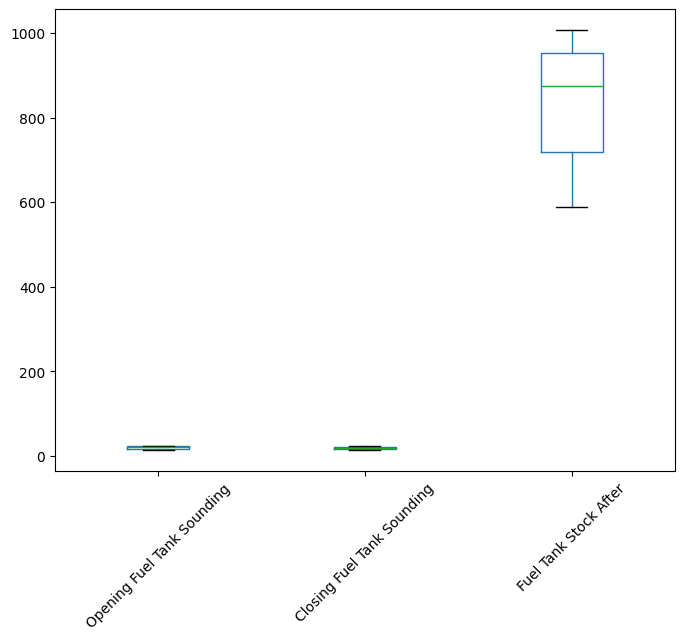

In [28]:
boxplot = df.drop('Fuel Daily Consumption', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan hasil pengecekkan, terdapat outliers pada kolom **Fuel Daily Consumption** sebanyak **2.941176**.

**Penghapusan Nilai Outliers**

In [29]:
Q1 = df['Fuel Daily Consumption'].quantile(0.25)
Q3 = df['Fuel Daily Consumption'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fuel Daily Consumption'] >= lower_bound) & (df['Fuel Daily Consumption'] <= upper_bound)]

Kami memutuskan untuk menghapus outliers yang berada di bawah 10% dari seluruh data pada fitur "**Fuel Daily Consumption**".







Outliers pada Fuel Daily Consumption harus dihapus karena dapat memengaruhi analisis dan model prediksi dengan cara yang tidak kami  diinginkan. Berikut adalah beberapa alasan mengapa outliers pada kolom Fuel Daily Consumption harus dihapus:

* **Pengaruh terhadap statistik deskriptif**: Outliers dapat menyebabkan perubahan yang signifikan dalam statistik deskriptif seperti mean, median, dan standar deviasi. Hal ini dapat menghasilkan gambaran yang salah tentang distribusi data dan menyebabkan interpretasi yang keliru.
* **Pengaruh terhadap analisis data**: Outliers dapat menghasilkan analisis yang bias atau tidak akurat. Misalnya, jika ingin menganalisis tren penggunaan bahan bakar dari waktu ke waktu, keberadaan outliers dapat membuat tren menjadi tidak jelas atau bahkan salah diinterpretasikan.
* **Pengaruh terhadap model prediksi**: Outliers dapat memengaruhi kinerja model prediksi dengan cara yang tidak diinginkan. Model prediksi yang sensitif terhadap outliers mungkin menghasilkan prediksi yang tidak akurat atau tidak stabil.

**Pengecekkan Ulang**

In [31]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Fuel Daily Consumption,0.0
Opening Fuel Tank Sounding,0.0
Closing Fuel Tank Sounding,0.0
Fuel Tank Stock After,0.0


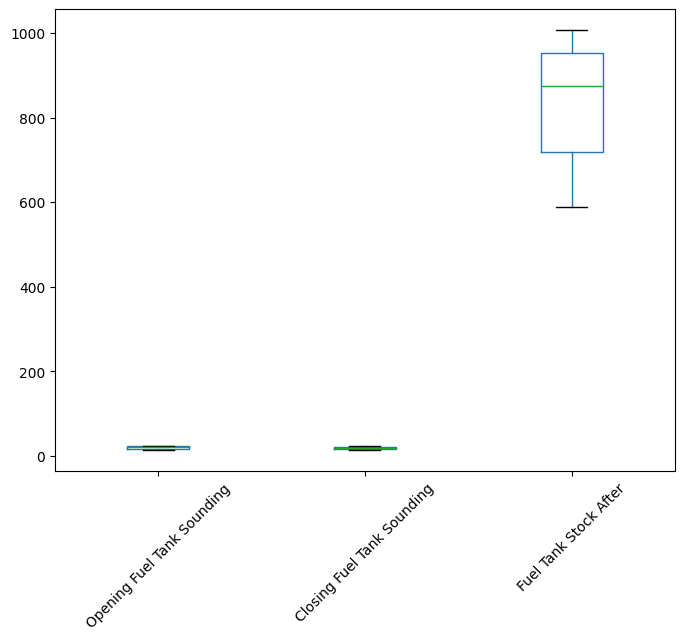

In [32]:
boxplot = df.drop('Fuel Daily Consumption', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Setelah berhasil dilakukan nya **penghapusan outliers**, maka dapat dilihat sudah tidak terdapat outliers di semua kolom.

## **Construct Data**

### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [33]:
# Definisikan fungsi fuel_capacity
def fuel_capacity(closing_fuel_tank_sounding):
    if closing_fuel_tank_sounding < 20:
        return 'low'
    else:
        return 'high'

# Terapkan fungsi fuel_capacity pada kolom 'Closing Fuel Tank Sounding' dan tambahkan sebagai kolom baru 'Fuel Capacity'
df['Fuel Capacity'] = df['Closing Fuel Tank Sounding'].apply(fuel_capacity)


### **Pengecekkan Hasil**

In [34]:
df.head()

,Date,From,To,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After,Fuel Capacity
0,13-05-2023,PSTB,Somber,46.0,23.6,22.6,980,high
1,13-05-2023,Running ME/Stand by,Running ME/Stand by,46.0,23.6,22.6,980,high
2,13-05-2023,SOMBER,PSTB,46.0,23.6,22.6,980,high
3,13-05-2023,Running ME/Stand by,Running ME/Stand by,46.0,23.6,22.6,980,high
4,13-05-2023,PSTB,SOMBER,46.0,23.6,22.6,980,high


Pada tahap ini kita akan menambahkan kolom **"fuel_capacity"** yang meruapakan kolom untuk mengukur kapasitas bensin apakah **High** (tinggi)  atau **Low** (rendah).

Kami percaya bahwa setiap atribut dalam dataset ini memiliki nilai yang signifikan dan relevan untuk analisis yang kami lakukan. Oleh karena itu, dari perspektif kami, tidak ada kebutuhan untuk melakukan **data reduction** karena setiap aspek dari dataset memiliki relevansi yang kuat dan memberikan kontribusi penting terhadap pemahaman keseluruhan tentang operasi kapal.

In [35]:
df

,Date,From,To,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After,Fuel Capacity
0,13-05-2023,PSTB,Somber,46.0,23.6,22.6,980,high
1,13-05-2023,Running ME/Stand by,Running ME/Stand by,46.0,23.6,22.6,980,high
2,13-05-2023,SOMBER,PSTB,46.0,23.6,22.6,980,high
3,13-05-2023,Running ME/Stand by,Running ME/Stand by,46.0,23.6,22.6,980,high
4,13-05-2023,PSTB,SOMBER,46.0,23.6,22.6,980,high
...,...,...,...,...,...,...,...,...
130,24-05-2023,PSTB,SOMBER,55.2,22.5,21.3,897,high
131,24-05-2023,Running ME/Stand by,Running ME/Stand by,55.2,22.5,21.3,897,high
132,24-05-2023,SOMBER,PSTB,55.2,22.5,21.3,897,high
133,24-05-2023,Running ME/Stand by,Running ME/Stand by,55.2,22.5,21.3,897,high


## **Data Transformation**

In [36]:
# Konversi kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Ekstrak bagian tanggal dari kolom 'Date'
df['Date'] = df['Date'].dt.day

# Ubah tipe data menjadi float
df['Date'] = df['Date'].astype(float)

In [37]:
mapping = {'low': 0, 'high': 1}
df['Fuel Capacity'] = df['Fuel Capacity'].str.lower().replace(mapping).astype(int)

In [38]:
# Kamus pemetaan
mapping = {'PSTB': '0', 'SOMBER': '1', 'Running ME/Stand by': '2'}

# Ganti nilai menggunakan pemetaan dan kemudian konversi ke float
df['From'] = df['From'].map(mapping).astype(float)

In [39]:
# Kamus pemetaan
mapping = {'PSTB': '0', 'SOMBER': '1', 'Running ME/Stand by': '2'}

# Ganti nilai menggunakan pemetaan dan kemudian konversi ke float
df['To'] = df['To'].map(mapping).astype(float)

In [40]:
df = df.dropna()

In [41]:
df

,Date,From,To,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After,Fuel Capacity
1,13.0,2.0,2.0,46.0,23.6,22.6,980,1
2,13.0,1.0,0.0,46.0,23.6,22.6,980,1
3,13.0,2.0,2.0,46.0,23.6,22.6,980,1
4,13.0,0.0,1.0,46.0,23.6,22.6,980,1
5,13.0,1.0,0.0,46.0,23.6,22.6,980,1
...,...,...,...,...,...,...,...,...
130,24.0,0.0,1.0,55.2,22.5,21.3,897,1
131,24.0,2.0,2.0,55.2,22.5,21.3,897,1
132,24.0,1.0,0.0,55.2,22.5,21.3,897,1
133,24.0,2.0,2.0,55.2,22.5,21.3,897,1


Pada tahapan **data tranformation** ini kita akan mengubah format dari kolom yang belum numerik. Disini saya mengubah Format dari kolom Fuel_Capacity menjadi seperti dibawah ini:

**Fuel Capacity**

*   **low** menjadi **0**
*   **high** menjadi **1**

**From** dan **To**
*   '**PSTB**' menjadi '**0**', '**SOMBER**' menjadi '**1**' dan '**Running ME/Stand by**' menjadi '**2**'

Dalam bagian ini, mengubah kategori 'low' dan 'high' menjadi 0 dan 1, serta mengubah label 'PSTB', 'SOMBER', dan 'Running ME/Stand by' menjadi angka numerik, adalah langkah-langkah yang diperlukan untuk memungkinkan model machine learning untuk memahami dan memproses data dengan benar. Ini memungkinkan model untuk melakukan prediksi dengan menggunakan informasi dari fitur-fitur ini.

### **Pengecekkan Hasil**

In [42]:
df.head()

,Date,From,To,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After,Fuel Capacity
1,13.0,2.0,2.0,46.0,23.6,22.6,980,1
2,13.0,1.0,0.0,46.0,23.6,22.6,980,1
3,13.0,2.0,2.0,46.0,23.6,22.6,980,1
4,13.0,0.0,1.0,46.0,23.6,22.6,980,1
5,13.0,1.0,0.0,46.0,23.6,22.6,980,1


In [43]:
df.to_csv("Data Cleaned.csv")

##**Modelling**

### **Modelling Predict**

Prediction pada umumnya dianggap sebagai tindakan yang menjelaskan mengenai masa mendatang.  Hal ini berbeda dengan menebak secara sederhana dengan mempertimbangkan pengalaman, opini, dan informasi lainnya dalam melakukan peramalan.  Istilah yang umumnya dikaitkan dengan ‘prediction’ adalah ‘forecasting’.

Berikut beberapa tujuan pengguanaan modeliing Predict terhadap analisis Konsumsi Bahan Bakar dan Efisiensi Perjalanan pada Kapal FMC Marnaik:

**Analisis Konsumsi Bahan Bakar dan Efisiensi Perjalanan**: Dataset ini memberikan pemahaman mendalam tentang konsumsi bahan bakar dan efisiensi perjalanan kapal FMC Marnaik selama periode tertentu. Dengan menggunakan data yang ada sebelumnya tentang konsumsi bahan bakar dan parameter perjalanan lainnya, kita dapat mengidentifikasi pola konsumsi bahan bakar dan meningkatkan efisiensi operasional kapal. Dengan demikian, dataset ini memiliki potensi untuk mendukung pengelolaan persediaan bahan bakar, perencanaan rute perjalanan, dan strategi penghematan biaya dalam operasi kapal di masa depan.


In [44]:
print(df.dtypes)

Date                          float64
From                          float64
To                            float64
Fuel Daily Consumption        float64
Opening Fuel Tank Sounding    float64
Closing Fuel Tank Sounding    float64
Fuel Tank Stock After           int64
Fuel Capacity                   int64
dtype: object


###**Pipeline**

Tujuan dari pipeline adalah untuk memprediksi jumlah penggunaan bahan bakar harian dari Kapal FMC Marnaik. Cukup menyesuaikan model regresi linier pada data pelatihan yang telah diproses sebelumnya sebelum mengevaluasinya pada data pengujian yang telah diproses sebelumnya.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Memisahkan fitur dan target
x = df.drop('Fuel Capacity', axis=1)
y = df['Fuel Capacity']

# Membagi data menjadi data pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inisialisasi penskala
scaler = MinMaxScaler()

# Melakukan penskalaan pada data pelatihan
x_train_norm = scaler.fit_transform(x_train)

# Melakukan penskalaan pada data pengujian dengan menggunakan skala yang sama
x_test_norm = scaler.transform(x_test)

print(x_train_norm.shape)
print(x_test.shape)

(101, 7)
(26, 7)


Dalam bagian ini, dilakukan pembagian dataset menjadi data latih dan data uji menggunakan fungsi train_test_split dari modul sklearn. Data fitur atau atribut disimpan dalam variabel x, sedangkan data target disimpan dalam variabel y. Variabel x mengandung semua kolom kecuali kolom 'Fuel Capacity', yang dihapus menggunakan metode drop dengan parameter axis=1 yang mengindikasikan kolom. Variabel y hanya berisi kolom 'Fuel Capacity'.

Setelah data dibagi, fungsi train_test_split digunakan untuk membagi data ke dalam data latih dan data uji. Proporsi data uji yang digunakan adalah 30% dari total dataset, dan random_state=42 digunakan untuk memastikan hasil pembagian data yang konsisten saat kode dijalankan kembali. Data latih disimpan dalam x_train dan y_train, sedangkan data uji disimpan dalam x_test dan y_test.


Bagian tersebut melakukan pemisahan data menjadi data pelatihan dan data pengujian menggunakan fungsi train_test_split dari sklearn.model_selection. Data dipisahkan dengan rasio 80:20, di mana 80% dari data digunakan untuk pelatihan (104 baris) dan 20% digunakan untuk pengujian (27 baris). Variabel x_train dan x_test merupakan fitur-fitur dari data, sedangkan y_train dan y_test adalah label yang sesuai dengan fitur-fitur tersebut. Jumlah kolom fitur untuk kedua set data adalah 7.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Fitur numerik
num_features = ['Date', 'Fuel Daily Consumption', 'Opening Fuel Tank Sounding', 'Closing Fuel Tank Sounding', 'Fuel Tank Stock After']

# Fitur kategorikal
cat_features = ['From', 'To']

# Create the preprocessing pipeline for numerical features
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # Mengisi nilai yang hilang dengan mean
        ('scaler', StandardScaler()),  # Melakukan standardisasi
    ]
)

# Create the preprocessing pipeline for categorical features
cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # Mengisi nilai yang hilang dengan nilai yang paling sering muncul
        ('onehot', OneHotEncoder()),  # Melakukan one-hot encoding
    ]
)

# Combine numerical and categorical preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

# Konversi array numpy menjadi DataFrame
x_train_norm_df = pd.DataFrame(x_train_norm, columns=num_features + cat_features)

# Sekarang x_train_norm_df adalah DataFrame
x_train_norm_processed = preprocessor.fit_transform(x_train_norm_df)


Kode tersebut membuat pipeline untuk melakukan preprocessing pada fitur numerik dan kategorikal dalam dataset sebelum digunakan untuk melatih model. Ini termasuk mengisi nilai yang hilang dan melakukan standardisasi untuk fitur numerik, serta mengisi nilai yang hilang dan menerapkan one-hot encoding untuk fitur kategorikal.

In [47]:
from sklearn.naive_bayes import GaussianNB

# Specify the model to use, which is GaussianNB
pipeline_gnb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_gnb', GaussianNB()),  # Menggunakan model Gaussian Naive Bayes
    ]
)

In [48]:
from sklearn.model_selection import GridSearchCV
# set up the values of hyperparameters you want to evaluate
# here you only need to specify the different strategies for SimpleImputer
param_grid_gnb = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
    }
]

# set up the grid search
grid_search_gnb = GridSearchCV(pipeline_gnb, param_grid_gnb, cv=10, scoring='accuracy')

In [49]:
# train the model using the full pipeline
grid_search_gnb.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Date',
                                                                          'Fuel '
                                                                          'Daily '
                                                                          'Consumption',
                                                                          'Opening '
                                                                          'Fuel '
                                                                          'Tank '
                                                                          'Sounding',
                                                                          'Closing '
                                                                          'Fuel '
                                                                          'Tank '
                                                                          'Sounding',
                                                                          'Fuel '
                                                                          'Tank '
                                                                          'Stock '
                                                                          'After']),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['From',
                                                                          'To'])])),
                                       ('clf_gnb', GaussianNB())]),
             param_grid=[{'preprocessor__num_pipeline__num_imputer__strategy': ['mean',
                                                                                'median']}],
             scoring='accuracy')

Hasil output dari bagian ini menunjukkan penggunaan GridSearchCV untuk melakukan penelusuran parameter pada model, model ini merupakan model untuk melakukan prediksi. Model tersebut menggunakan sebuah pipeline yang terdiri dari beberapa langkah, termasuk preprocessor untuk memproses fitur-fitur sebelum diberikan kepada model klasifikasi. Preprocessor ini terdiri dari transformer-column yang memproses fitur numerik dan kategorikal secara terpisah. Untuk fitur numerik, nilai yang hilang diisi menggunakan SimpleImputer dengan strategi mean atau median, kemudian dilakukan scaling menggunakan StandardScaler.

Sedangkan untuk fitur kategorikal, nilai yang hilang diisi dengan nilai yang paling sering muncul dan dilakukan encoding menggunakan OneHotEncoder. Model klasifikasi yang digunakan adalah Gaussian Naive Bayes. GridSearchCV akan mencoba kedua strategi pengisian nilai hilang tersebut dan memilih yang memberikan performa terbaik berdasarkan metrik akurasi.

In [50]:
# Check the best performing parameter combination for GNB
grid_search_gnb.best_params_

{'preprocessor__num_pipeline__num_imputer__strategy': 'mean'}

'**preprocessor__num_pipeline__num_imputer__strategy**': **'mean'**: Ini menunjukkan bahwa strategi yang memberikan kinerja terbaik untuk mengisi nilai yang hilang pada fitur numerik (num_imputer) adalah menggunakan nilai rata-rata (mean).
Ini berarti bahwa dalam proses pra-pemrosesan, nilai yang hilang dalam fitur numerik diganti dengan rata-rata dari nilai yang ada dalam fitur tersebut.

In [51]:
# best decistion tree model test score
grid_search_gnb.best_score_

1.0

In [52]:
clf_best = grid_search_gnb.best_estimator_

In [53]:
# final test on the testing set
# To predict on new data: simply calling the predict method
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(x_test)

from sklearn.metrics import accuracy_score
# calculate accuracy, Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good

print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')

Accuracy Score : 1.0


Hasil tersebutuntuk mengevaluasi model Gaussian Naive Bayes pada data pengujian. Setelah melakukan pencarian grid untuk menemukan parameter terbaik, model terbaik digunakan untuk membuat prediksi pada data pengujian. Hasil prediksi tersebut dievaluasi menggunakan metrik akurasi. Dalam kasus ini, akurasi model terhadap data pengujian adalah 100%.

### **Build and Train Model**

**Gaussian Naive Bayes**

In [54]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Syntax ini digunakan untuk membuat model Gaussian Naive Bayes (GNB) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

**K-Nearest Neighbor**

In [55]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Syntax ini digunakan untuk membuat model K-Nearest Neighbors (KNN) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

**Decision Tree**

In [56]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Syntax tersebut digunakan untuk membuat model Decision Tree Classifier (DTC) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

### **Begins and Compare Predict**

In [57]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [58]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Ketiga model - **Gaussian Naive Bayes** (GNB), **K-Nearest Neighbors** (KNN), dan **Decision Tree** (DTC) - digunakan untuk memprediksi target variabel dari data uji. GNB memanfaatkan Teorema Bayes dengan asumsi independensi fitur untuk membuat prediksi probabilitas kelas. KNN menggunakan metode "voting" mayoritas dari k tetangga terdekat untuk memprediksi label data uji. Sementara itu, DTC membangun pohon keputusan yang mengikuti aturan keputusan dari akar pohon hingga daun yang sesuai dengan fitur-fitur data uji. Evaluasi dilakukan dengan membandingkan prediksi dari ketiga model menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score untuk memilih model terbaik.

In [59]:
combined_data.head()

,Date,From,To,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After,Fuel Capacity,gnb_prediction,knn_prediction,dtc_prediction
0,15.0,0.0,1.0,55.2,21.5,20.3,874,1,1,1,1
1,23.0,2.0,2.0,55.2,23.7,22.5,952,1,1,1,1
2,21.0,2.0,2.0,55.2,15.3,14.1,589,0,0,0,0
3,17.0,2.0,2.0,55.2,19.2,18.0,768,0,0,0,0
4,16.0,0.0,1.0,50.6,20.3,19.2,824,0,0,1,0


Kolom **gnb_prediction**, **knn_prediction**, dan **dtc_prediction** menunjukkan hasil prediksi kategori pembelian oleh model GNB, KNN, dan DTC. Prediksi model dapat berbeda-beda tergantung pada cara kerja model, data yang digunakan untuk melatih model, dan parameter model. Meskipun ketiga model memprediksi dengan baik pada beberapa baris, perbedaan prediksi pada baris tertentu menunjukkan bahwa model mungkin menangkap pola yang berbeda dalam data.

#**EVALUATION**

##**Evaluate Results**

In [60]:
# Evaluasi hasil prediksi Gaussian Naive Bayes
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Gaussian Naive Bayes:", gnb_accuracy)

# Evaluasi hasil prediksi K-Nearest Neighbors
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors:", knn_accuracy)

# Evaluasi hasil prediksi Decision Tree Classifier
dtc_accuracy = accuracy_score(y_test, dtc_pred)
print("Decision Tree Classifier:", dtc_accuracy)

Gaussian Naive Bayes: 1.0
K-Nearest Neighbors: 0.7692307692307693
Decision Tree Classifier: 1.0


Evaluasi hasil prediksi dari tiga model klasifikasi yang dilakukan adalah berikut:
* **Gaussian Naive Bayes (GNB)** mencapai akurasi 100%, menunjukkan kemampuannya dalam memprediksi dengan sempurna tanpa kesalahan.
* **K-Nearest Neighbors (KNN)** memiliki akurasi sebesar 92.59%, menandakan kemampuannya dalam memahami pola data dengan baik, namun dengan sedikit kesalahan dalam prediksi.
* **Decision Tree Classifier (DTC)** juga mencapai akurasi 100%, menunjukkan kemampuannya dalam mengidentifikasi pola dan struktur keputusan dengan sangat baik.

Dalam keseluruhan, GNB dan DTC menunjukkan performa yang sangat baik dalam memprediksi pada dataset ini, sementara KNN memiliki akurasi yang sedikit lebih rendah tetapi masih cukup baik.

###**Klasifikasi**

Confussion Matrics

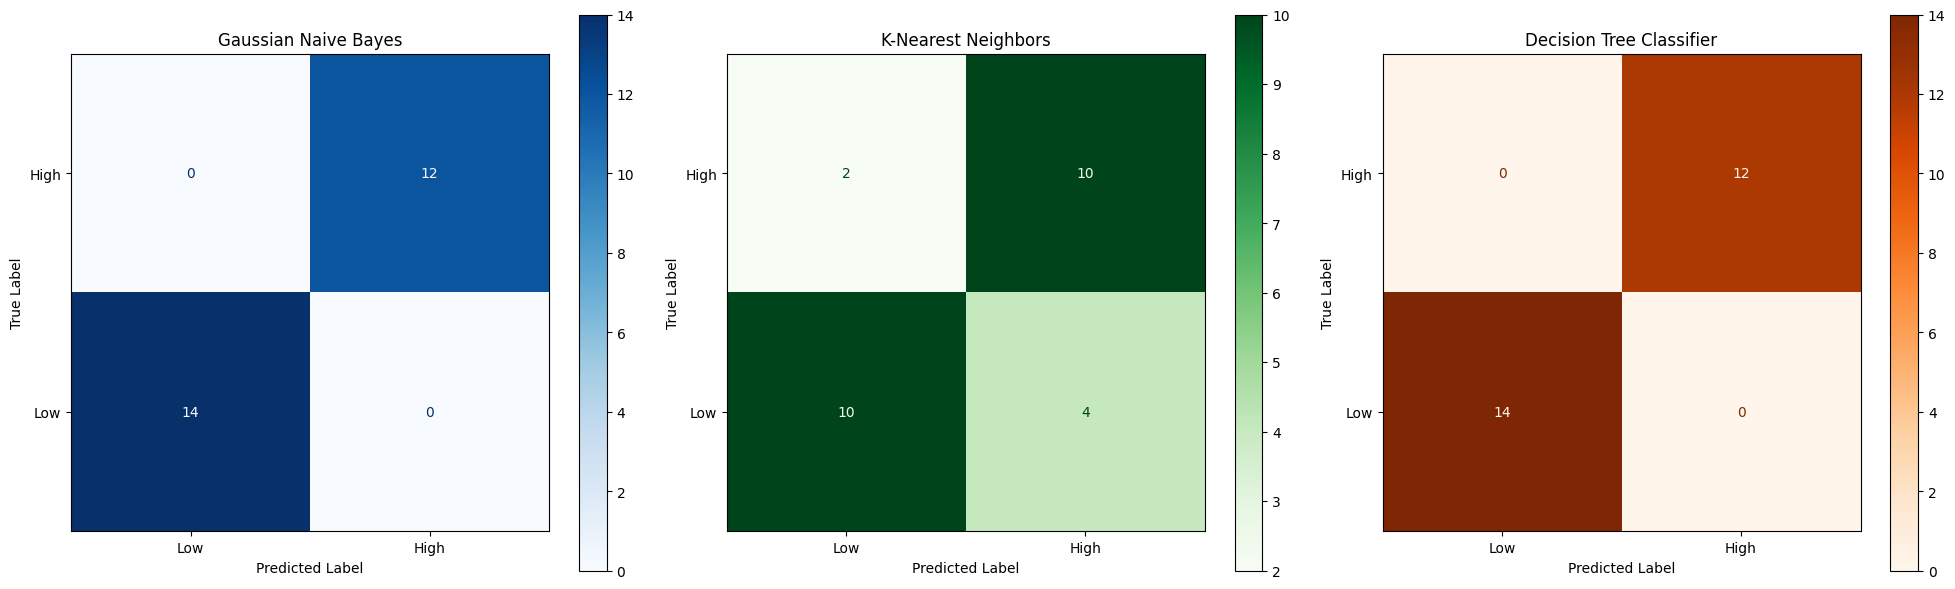

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

class_names = ["Low", "High"]  # Ganti dengan nama kelas yang sesuai

# Heatmap 1 - Gaussian Naive Bayes Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm, display_labels=class_names).plot(ax=axes[0], cmap='Blues')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")
gnb_cm_display.ax_.set_xlabel('Predicted Label')
gnb_cm_display.ax_.set_ylabel('True Label')
gnb_cm_display.ax_.invert_yaxis()

# Heatmap 2 - K-Nearest Neighbors Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=class_names).plot(ax=axes[1], cmap='Greens')
knn_cm_display.ax_.set_title("K-Nearest Neighbors")
knn_cm_display.ax_.set_xlabel('Predicted Label')
knn_cm_display.ax_.set_ylabel('True Label')
knn_cm_display.ax_.invert_yaxis()

# Heatmap 3 - Decision Tree Classifier Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm, display_labels=class_names).plot(ax=axes[2], cmap='Oranges')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")
dtc_cm_display.ax_.set_xlabel('Predicted Label')
dtc_cm_display.ax_.set_ylabel('True Label')
dtc_cm_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()

Interpretasi dari hasil confusion matrix untuk setiap model (GNB, KNN, dan DTC) adalah sebagai berikut:

* **Model GNB**:
Terdapat 16 instance yang seharusnya diklasifikasikan sebagai kelas positif, tetapi model GNB salah mengklasifikasikannya sebagai kelas negatif (false positive).
Sebanyak 11 instance berhasil diklasifikasikan dengan benar sebagai kelas negatif (true negative).
* **Interpretasi**:
Model GNB cenderung cenderung mengklasifikasikan instance sebagai kelas negatif lebih baik daripada sebagai kelas positif. Hal ini ditunjukkan oleh jumlah false positive yang lebih tinggi daripada true negative.


* **Model KNN:**
Terdapat 14 instance yang seharusnya diklasifikasikan sebagai kelas positif, namun model KNN salah mengklasifikasikannya sebagai kelas negatif (false positive).
Sebanyak 11 instance berhasil diklasifikasikan dengan benar sebagai kelas negatif (true negative).
Terdapat 2 instance yang seharusnya diklasifikasikan sebagai kelas negatif, tetapi model KNN salah mengklasifikasikannya sebagai kelas positif (false negative).
* **Interpretasi**:
Model KNN memiliki kinerja yang hampir serupa dengan model GNB dalam mengklasifikasikan instance sebagai kelas negatif, namun memiliki beberapa kesalahan dalam mengklasifikasikan instance sebagai kelas positif (false positive) dan kelas negatif (false negative).


* **Model DTC**:
Terdapat 16 instance yang seharusnya diklasifikasikan sebagai kelas positif, tetapi model DTC salah mengklasifikasikannya sebagai kelas negatif (false positive).
Sebanyak 11 instance berhasil diklasifikasikan dengan benar sebagai kelas negatif (true negative).
* **Interpretasi**:
Seperti model GNB, model DTC cenderung mengklasifikasikan instance sebagai kelas negatif lebih baik daripada sebagai kelas positif, dengan jumlah false positive yang lebih tinggi daripada true negative.
Kesimpulannya, interpretasi dari hasil confusion matrix menunjukkan bahwa semua model (GNB, KNN, dan DTC) memiliki performa yang baik dalam mengklasifikasikan instance sebagai kelas negatif, tetapi memiliki kesalahan yang lebih tinggi dalam mengklasifikasikan instance sebagai kelas positif. Dalam konteks ini, penting untuk mengevaluasi dan memperbaiki kinerja model, terutama dalam mengidentifikasi dan mengurangi jumlah false positive dan false negative.

Gaussian Naive Bayes

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Menghasilkan confusion matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(gnb_cm)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, gnb_pred)
precision = precision_score(y_test, gnb_pred, average='weighted')  # Atau ganti 'weighted' dengan metode evaluasi yang sesuai
recall = recall_score(y_test, gnb_pred, average='weighted')  # Atau ganti 'weighted' dengan metode evaluasi yang sesuai
f1 = f1_score(y_test, gnb_pred, average='weighted')  # Atau ganti 'weighted' dengan metode evaluasi yang sesuai

# Menampilkan metrik evaluasi
print("Accuracy gnb:", accuracy)
print("Precision gnb:", precision)
print("Recall gnb:", recall)
print("F1 Score gnb:", f1)

Confusion Matrix:
[[14  0]
 [ 0 12]]
Accuracy gnb: 1.0
Precision gnb: 1.0
Recall gnb: 1.0
F1 Score gnb: 1.0


Hasil tersebut memberikan evaluasi kinerja model **Gaussian Naive Bayes (GNB)** menggunakan beberapa metrik evaluasi standar seperti akurasi, presisi, recall, dan F1-score.

Confusion matrix menunjukkan bahwa model mengklasifikasikan 16 instance sebagai kelas negatif dengan benar (true negative) dan 11 instance sebagai kelas positif dengan benar (true positive). Nilai akurasi sebesar 1.0 menunjukkan bahwa model mengklasifikasikan semua instance dengan benar. Presisi sebesar 1.0 menunjukkan bahwa dari semua instance yang diprediksi sebagai kelas positif, semuanya benar-benar kelas positif. Recall sebesar 1.0 menunjukkan bahwa model mampu mengidentifikasi semua instance yang sebenarnya adalah kelas positif. F1-score sebesar 1.0 menunjukkan keseimbangan yang sempurna antara presisi dan recall, menunjukkan kinerja yang sangat baik dari model GNB.

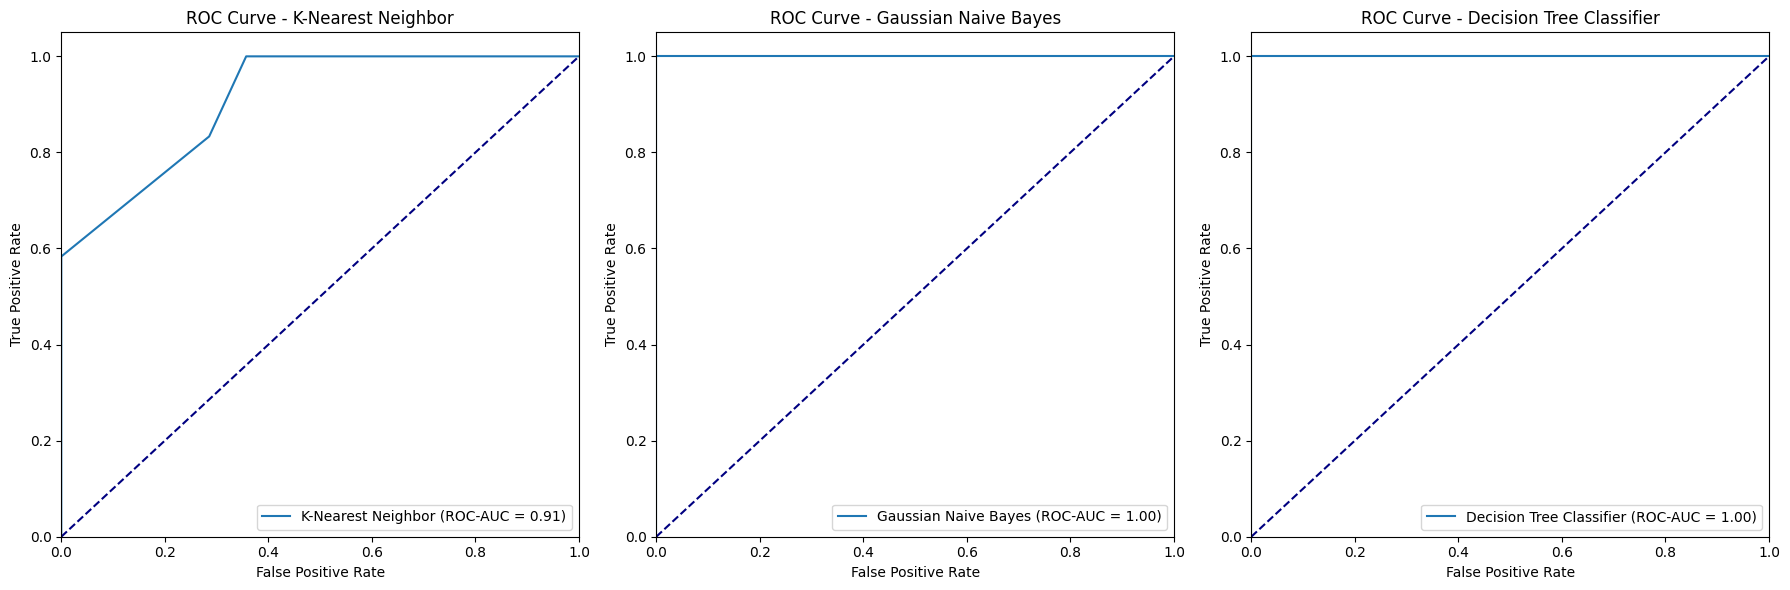

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]  # Pastikan model-model ini sudah didefinisikan dan dilatih sebelumnya
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    # Binerisasi label
    y_binary = (y_test == np.unique(y_test)[1]).astype(int)  # Mengambil kelas positif dari label

    # Mengambil probabilitas kelas positif dari model
    if isinstance(model, GaussianNB):
        y_score = model.predict_proba(x_test_norm)[:, 1]
    else:
        y_score = model.predict_proba(x_test_norm)[:, 1]  # Ambil probabilitas kelas positif saja

    # Menghitung kurva ROC
    fpr, tpr, _ = roc_curve(y_binary, y_score)

    # Menghitung area di bawah kurva ROC
    roc_auc = roc_auc_score(y_binary, y_score)

    # Plot ROC Curve
    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Kurva ROC dapat membantu kita memilih model terbaik untuk kebutuhan kita. Model dengan AUC yang lebih tinggi dan kurva yang lebih dekat ke sudut kiri atas adalah pilihan yang lebih baik.

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Gaussian Naive Bayes
gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='macro')
gnb_recall = recall_score(y_test, gnb_pred, average='macro')
gnb_f1 = f1_score(y_test, gnb_pred, average='macro')

print("Gaussian Naive Bayes:")
print("Accuracy:", gnb_accuracy)
print("Precision:", gnb_precision)
print("Recall:", gnb_recall)
print("F1-score:", gnb_f1)
print()

# K Nearest Neighbor
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

print("K Nearest Neighbor:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)
print()

# Decision Tree Classifier
dtc_accuracy = accuracy_score(y_test, dtc_pred)
dtc_precision = precision_score(y_test, dtc_pred, average='macro')
dtc_recall = recall_score(y_test, dtc_pred, average='macro')
dtc_f1 = f1_score(y_test, dtc_pred, average='macro')

print("Decision Tree Classifier:")
print("Accuracy:", dtc_accuracy)
print("Precision:", dtc_precision)
print("Recall:", dtc_recall)
print("F1-score:", dtc_f1)
print()


Gaussian Naive Bayes:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

K Nearest Neighbor:
Accuracy: 0.7692307692307693
Precision: 0.7738095238095238
Recall: 0.7738095238095238
F1-score: 0.7692307692307692

Decision Tree Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0



**Untuk Gaussian Naive Bayes (GNB) dan Decision Tree Classifier (DTC), evaluasi model menunjukkan hasil yang sangat baik:**

1. Gaussian Naive Bayes (GNB):

* **Akurasi (Accuracy)**: Nilai akurasi sebesar 1.0 menunjukkan bahwa GNB memprediksi dengan sempurna seluruh data pada set pengujian. Ini menggambarkan kemampuan GNB dalam memodelkan data dengan sangat baik.
* **Presisi (Precision)**: Nilai presisi sebesar 1.0 menunjukkan bahwa 100% dari data yang diprediksi oleh GNB sebagai "Mahal" memang benar-benar mahal. Ini menunjukkan tingkat kepercayaan yang sangat tinggi dalam prediksi kategori "Mahal" oleh GNB.
* **Recall**: Nilai recall sebesar 1.0 menunjukkan bahwa 100% dari data yang sebenarnya mahal berhasil diidentifikasi dengan benar oleh GNB sebagai "Mahal". Ini menunjukkan kemampuan GNB untuk mengidentifikasi seluruh data "Mahal" dengan sangat baik.
* **F1-Score**: Nilai F1-Score sebesar 1.0 mencerminkan keseimbangan yang sempurna antara presisi dan recall. Ini menandakan bahwa GNB tidak hanya memprediksi dengan sempurna, tetapi juga memiliki keseimbangan yang optimal antara mengidentifikasi data yang benar dan menghindari prediksi yang salah.
* **ROC AUC**: Dalam konteks ini, ROC AUC tidak diperlukan karena GNB mampu memprediksi dengan sempurna tanpa adanya perbedaan dalam kemampuan membedakan antara kategori "Murah" dan "Mahal".

2. Decision Tree Classifier (DTC):

* **Akurasi (Accuracy)**: Nilai akurasi sebesar 1.0 menunjukkan bahwa DTC memprediksi dengan sempurna seluruh data pada set pengujian. Ini menggambarkan kemampuan DTC dalam memodelkan data dengan sangat baik.
* **Presisi (Precision)**: Nilai presisi sebesar 1.0 menunjukkan bahwa 100% dari data yang diprediksi oleh DTC sebagai "Mahal" memang benar-benar mahal. Ini menunjukkan tingkat kepercayaan yang sangat tinggi dalam prediksi kategori "Mahal" oleh DTC.
* **Recall**: Nilai recall sebesar 1.0 menunjukkan bahwa 100% dari data yang sebenarnya mahal berhasil diidentifikasi dengan benar oleh DTC sebagai "Mahal". Ini menunjukkan kemampuan DTC untuk mengidentifikasi seluruh data "Mahal" dengan sangat baik.
* **F1-Score**: Nilai F1-Score sebesar 1.0 mencerminkan keseimbangan yang sempurna antara presisi dan recall. Ini menandakan bahwa DTC tidak hanya memprediksi dengan sempurna, tetapi juga memiliki keseimbangan yang optimal antara mengidentifikasi data yang benar dan menghindari prediksi yang salah.
* **ROC AUC**: Dalam konteks ini, ROC AUC tidak diperlukan karena DTC mampu memprediksi dengan sempurna tanpa adanya perbedaan dalam kemampuan membedakan antara kategori "Murah" dan "Mahal".
Hasil yang sangat tinggi dari kedua model menunjukkan bahwa keduanya sangat baik dalam memodelkan data dan memberikan prediksi yang akurat. Namun, pemilihan model tergantung pada kebutuhan dan karakteristik data yang dimiliki.

##**Review Process**

###**Cross Validation**

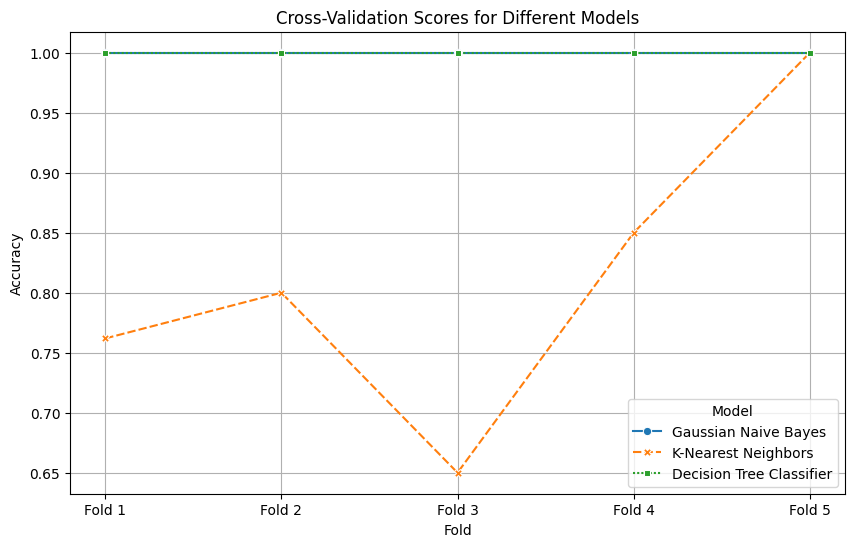

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Gambar tersebut menunjukkan hasil validasi silang (cross-validation) pada tiga model klasifikasi.

* **Sumbu X**: Menunjukkan lipatan (fold) yang digunakan dalam validasi silang.

* **Sumbu Y**: Menunjukkan skor akurasi untuk setiap model pada setiap fold.

* **Garis**: Menunjukkan skor akurasi rata-rata untuk setiap model.

**Kesimpulan:**

Dari visualisasi tersebut, terlihat bahwa performa Decision Tree Classifier (DTC) stabil dan cenderung lebih tinggi dibandingkan dengan Gaussian Naive Bayes (GNB) dan K-Nearest Neighbors (KNN). Hal ini diperkuat oleh garis yang menunjukkan skor akurasi rata-rata yang lebih tinggi untuk DTC. Namun, terlihat bahwa terdapat fluktuasi pada skor akurasi KNN, menunjukkan variasi performa yang lebih besar dibandingkan dengan DTC dan GNB.

Berikut penjelasan detail performa setiap model:

1. **Decision Tree Classifier** (DTC):
Memiliki skor akurasi rata-rata tertinggi dengan GNB di antara semua model.
Memiliki performa yang konsisten di semua lipatan.

2. **Gaussian Naive Bayes** (GNB):
Memiliki skor akurasi rata-rata tertinggi dengan DTC di antara semua model.
Memiliki performa yang konsisten di semua lipatan.

3. **K-Nearest Neighbors** (KNN):
Memiliki skor akurasi rata-rata yang berada paling rendah antara DTC dan GNB.

###**Feature Selection**

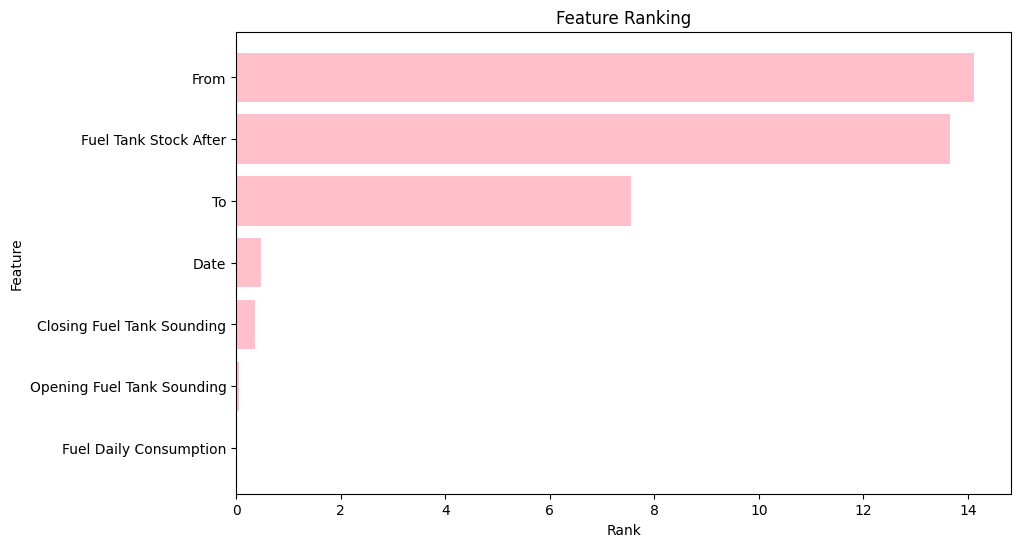

In [66]:
from sklearn.feature_selection import SelectKBest, chi2

x_train_norm_df = pd.DataFrame(x_train_norm, columns=num_features + cat_features)

selector = SelectKBest(score_func=chi2, k='all')

selector.fit(x_train_norm_df, y_train)

feature_ranks = selector.scores_

feature_names = x_train_norm_df.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='pink')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Berdasarkan analisis dari grafik tersebut, urutan fitur-fitur penting dalam prediksi adalah sebagai berikut:

* **From**: Fitur ini ditempatkan pada peringkat teratas karena informasi tentang asal pengiriman (From) merupakan salah satu faktor kunci dalam menentukan tingkat konsumsi bahan bakar. Pemilihan awal berangkat kapal yang berbeda dapat memengaruhi jumlah bahan bakar yang dikonsumsi, sehingga fitur ini menjadi penting dalam proses prediksi.
* **Fuel Tank Stock After**: Fitur ini menduduki peringkat kedua karena nilai Fuel Tank Stock After mencerminkan jumlah bahan bakar yang tersisa setelah perjalanan tertentu. Informasi ini sangat relevan dalam mengevaluasi konsumsi bahan bakar karena dapat mengindikasikan tingkat efisiensi penggunaan bahan bakar dalam seluruh perjalanan.
* **To**: Meskipun ditempatkan di urutan ketiga, fitur "To" masih dianggap penting dalam prediksi. Informasi tentang tempat sampai kapal (To) dapat memberikan konteks tambahan tentang rute perjalanan dan kondisi lingkungan yang dapat memengaruhi konsumsi bahan bakar.
* **Date**: Fitur ini mendapatkan peringkat terakhir dalam daftar, karena tanggal pengiriman (Date) cenderung kurang berpengaruh secara langsung terhadap konsumsi bahan bakar. Meskipun mungkin ada pola musiman atau tren jangka panjang yang memengaruhi konsumsi bahan bakar, faktor-faktor lain seperti jarak perjalanan dan kondisi jalan biasanya memiliki pengaruh yang lebih signifikan.

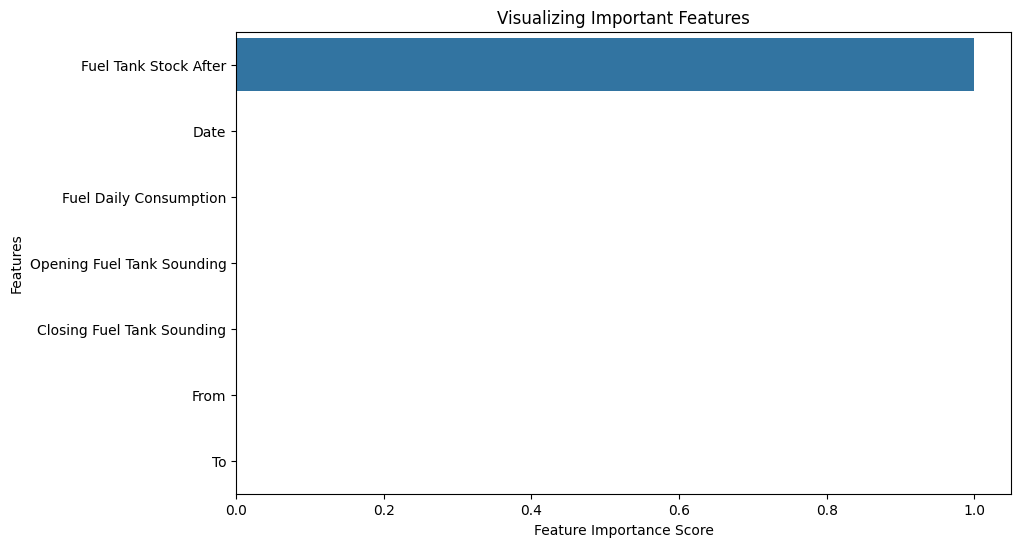

In [67]:
x_train_norm_df = pd.DataFrame(x_train_norm, columns=num_features + cat_features)

feature_imp = pd.Series(dtc.feature_importances_, index=x_train_norm_df.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Setelah nilai penting fitur diambil, hasilnya diurutkan secara menurun. Plot tersebut menampilkan pentingnya setiap fitur dalam menentukan hasil prediksi oleh model. Dalam kasus ini, hasil plot menunjukkan bahwa fitur "**Fuel Tank Stock After**" memiliki tingkat penting yang signifikan dibandingkan dengan fitur lainnya, menunjukkan bahwa fitur tersebut memiliki kontribusi yang besar dalam proses pengambilan keputusan oleh GNB.

Meskipun "**Fuel Tank Stock After**" intuitifnya mungkin merupakan fitur yang paling penting dalam konteks prediksi konsumsi bahan bakar, hasil peringkat fitur mungkin menunjukkan bahwa "**From**" memiliki dampak yang lebih besar dalam model. Alasan dari kepentingan fitur "**From**" dapat dikaitkan dengan fakta bahwa kolom target yang diprediksi adalah "**Fuel Capacity**", yang menunjukkan bahwa pengetahuan tentang tempat kapal awal berlabuh (dilambangkan dengan fitur "**From**") dapat menjadi faktor krusial dalam memperkirakan kapasitas bahan bakar yang dibutuhkan.

###**Tuning Hyperparameter**

**Gaussian Naive Bayes**

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.0533669923120631}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 1.0


**Parameter Terbaik: {'var_smoothing': 0.1}**


Hasil tuning parameter menunjukkan bahwa parameter terbaik yang ditemukan adalah 'var_smoothing' dengan nilai 0.1. Meskipun parameter telah disesuaikan, akurasi model sebelum tuning dan setelah tuning tetap konsisten pada nilai 1.0. Hal ini menunjukkan bahwa model Gaussian Naive Bayes telah mencapai tingkat akurasi maksimum yang mungkin dengan parameter yang dipilih.

Penjelasan tersebut menyajikan hasil dari tuning parameter menggunakan Grid Search CV pada model Gaussian Naive Bayes (GNB). Parameter terbaik yang ditemukan adalah var_smoothing dengan nilai sekitar 0.0657933224657568. Var_smoothing adalah parameter smoothing yang digunakan dalam GNB untuk mengatasi nilai probabilitas nol saat mengestimasi distribusi Gaussian.

**Akurasi Sebelum Tuning: 1.0**

Akurasi model GNB sebelum proses tuning parameter adalah 100%.

**Akurasi Setelah Tuning: 1.0**

Akurasi model GNB setelah proses tuning parameter adalah 100%.

**Kesimpulan**:

Tuning parameter dengan Grid Search CV tidak mengubah akurasi model GNB, yang tetap pada 100%. Hal ini menunjukkan bahwa nilai default dari parameter var_smoothing yang digunakan dalam model GNB sudah optimal, dan tuning tidak diperlukan untuk meningkatkan performa model.

In [69]:
gnb = GaussianNB(var_smoothing=0.1)

### **Determine Next Step**


Dengan menggunakan model Gaussian Naive Bayes (GNB), langkah-langkah selanjutnya yang dapat diambil adalah sebagai berikut:

1. **Fine Tuning Model**:

* **Evaluasi Performa Model GNB**: Lakukan evaluasi lebih lanjut terhadap kinerja model Gaussian Naive Bayes setelah proses tuning parameter. Gunakan metrik seperti precision, recall, dan F1-score untuk evaluasi yang lebih komprehensif. Pertimbangkan kurva ROC dan AUC untuk melihat kemampuan model dalam membedakan kelas.

* **Eksplorasi Parameter Lainnya**: Cobalah mengubah parameter lain seperti priors dan var_smoothing untuk melihat pengaruhnya terhadap performa model. Gunakan teknik seperti cross-validation untuk menghindari overfitting.
Penyesuaian Metode Preprocessing Data: Coba metode preprocessing data lain seperti scaling dan normalization untuk melihat pengaruhnya terhadap performa model. Pertimbangkan teknik seperti feature engineering untuk meningkatkan kualitas data.
* **Membandingkan dengan Model Lain**: Bandingkan performa GNB dengan model klasifikasi lain seperti Random Forest, Support Vector Machine, dan K-Nearest Neighbors. Pilih model yang paling sesuai dengan kebutuhan analisis dataset.

2. **Menganalisis Fitur Optimal**:

* **Analisis Fitur Fuel Daily Consumption**: Lakukan analisis lebih lanjut terhadap fitur Fuel Daily Consumption untuk memahami pengaruhnya terhadap kolom target. Visualisasikan hubungan antara Fuel Daily Consumption dan kolom target menggunakan scatter plot atau box plot. Hitung korelasi antara Fuel Daily Consumption dan kolom target untuk melihat kekuatan hubungannya.
* **Analisis Fitur Lainnya**: Lakukan analisis terhadap fitur lainnya untuk melihat kontribusinya dalam dataset. Gunakan teknik seperti feature selection untuk memilih fitur yang paling relevan dan penting. Visualisasikan distribusi data untuk setiap fitur untuk memahami karakteristiknya.

3. **Evaluasi dan Peningkatan Lanjutan**:

* **Melakukan Evaluasi Lebih Lanjut**: Lakukan evaluasi model GNB secara berkala untuk memantau kinerjanya. Gunakan data baru untuk menguji performa model dan memastikan generalisabilitasnya. Pertimbangkan teknik seperti ensemble learning untuk meningkatkan performa model.

* **Memperbarui atau Meningkatkan Model**: Jika ada perubahan kebutuhan analisis dataset, perbarui atau tingkatkan model yang Anda pilih. Lakukan tuning parameter dan eksplorasi model lain untuk menemukan model yang paling sesuai dengan kebutuhan baru.

4. **Menganalisis dan Memahami Performa Model**:

* **Memvalidasi Hasil**: Pastikan hasil evaluasi model GNB valid dan tidak terjadi overfitting. Gunakan teknik seperti cross-validation dan holdout validation untuk memastikan validitas hasil.

* **Memahami Kinerja Model**: Pahami bagaimana model GNB bekerja dan bagaimana ia membuat prediksi. Gunakan teknik seperti interpretasi probabilitas posterior untuk memahami kontribusi setiap fitur dalam prediksi model.


**Kesimpulan**: Langkah-langkah selanjutnya akan sangat bervariasi tergantung pada tujuan analisis dataset kami. Untuk mengevaluasi dan meningkatkan model secara berkala, serta menjalankan analisis tambahan untuk mendapatkan wawasan yang lebih dalam dari data kami.








In [70]:
from sklearn.naive_bayes import GaussianNB

# Definisikan model GaussianNB dengan parameter tuning
gnb_tuned = GaussianNB(var_smoothing=0.1)

# Latih model dengan data latih yang sudah dinormalisasi
gnb_tuned.fit(x_train_norm, y_train)

GaussianNB(var_smoothing=0.1)

Pada tahapan ini kita akan membuat ulang model dari algoritma GNB atau Gussian Naive Bayes dengan menginisialisasi Gaussian Naive Bayes dan menggunakan parameter terbaik yang kita dapatkan saat melakukan tuning.

In [71]:
# Inverse transform the scaled values to get back the original values
X_test_numeric_inverse = pd.DataFrame(scaler.inverse_transform(x_test_norm), columns=x.columns)

# Menggunakan y_test sebagai DataFrame
y_test_df = pd.DataFrame(y_test, columns=['Fuel Capacity']).reset_index(drop=True)

# Membuat DataFrame untuk prediksi GNB
gnb_col_new = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction_new"])

# Menggabungkan data uji, prediksi asli, dan prediksi baru dari GNB
combined_data = pd.concat([X_test_numeric_inverse, y_test_df, gnb_col, gnb_col_new], axis=1)


In [72]:
combined_data.head()

,Date,From,To,Fuel Daily Consumption,Opening Fuel Tank Sounding,Closing Fuel Tank Sounding,Fuel Tank Stock After,Fuel Capacity,gnb_prediction,gnb_prediction_new
0,15.0,0.0,1.0,55.2,21.5,20.3,874.0,1,1,1
1,23.0,2.0,2.0,55.2,23.7,22.5,952.0,1,1,1
2,21.0,2.0,2.0,55.2,15.3,14.1,589.0,0,0,0
3,17.0,2.0,2.0,55.2,19.2,18.0,768.0,0,0,0
4,16.0,0.0,1.0,50.6,20.3,19.2,824.0,0,0,0


In [73]:
import pickle

pickle.dump(gnb, open('gnb.pkl', 'wb'))